In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from pylab import rcParams

In [2]:
#pd.concat([pd.read_csv('./DF_1c_len20_top10_65.97_nounk_a.csv'), 
#                pd.read_csv('./DF_1c_len20_top10_65.97_nounk_b.csv')]).to_csv('DF_1c_len20_top10_65.97_nounk.csv',
#                                                                             index=False)

In [3]:
baseline_1c = pd.read_csv('./DF_folder/DF_1c_len20_top10_nounk.csv')
baseline_2c = pd.read_csv('./DF_folder/DF_2c_len20_top10_nounk.csv')

proposed_1c = pd.read_csv('./DF_1c_len20_top10_65.97_nounk.csv')
proposed_2c = pd.read_csv('./DF_2c_20_top10_61.584_nounk_ALL.csv')

In [4]:
baseline_2c.true_perspective = baseline_2c.true_perspective.astype(str)
baseline_2c.predicted_perspective = baseline_2c.predicted_perspective.astype(str)
proposed_2c.true_perspective = proposed_2c.true_perspective.astype(str)
proposed_2c.predicted_perspective = proposed_2c.predicted_perspective.astype(str)

In [5]:
def get_view_name(value):
    if value == 'True':
        return 'personal'
    return 'impersonal'

In [6]:
baseline_2c.true_perspective = baseline_2c.true_perspective.apply(get_view_name)
baseline_2c.predicted_perspective = baseline_2c.predicted_perspective.apply(get_view_name)

proposed_2c.true_perspective = proposed_2c.true_perspective.apply(get_view_name)
proposed_2c.predicted_perspective = proposed_2c.predicted_perspective.apply(get_view_name)

In [7]:
baseline_2c['true_label'] = baseline_2c.true_theme + '\n' + baseline_2c.true_perspective
baseline_2c['predicted_label'] = baseline_2c.predicted_theme + '\n' + baseline_2c.predicted_perspective

proposed_2c['true_label'] = proposed_2c.true_theme + '\n' + proposed_2c.true_perspective
proposed_2c['predicted_label'] = proposed_2c.predicted_theme + '\n' + proposed_2c.predicted_perspective

In [8]:
baseline_1c['true_label'] = baseline_1c.true_theme
baseline_1c['predicted_label'] = baseline_1c.predicted_theme
proposed_1c['true_label'] = proposed_1c.true_theme
proposed_1c['predicted_label'] = proposed_1c.predicted_theme

Normalized confusion matrix


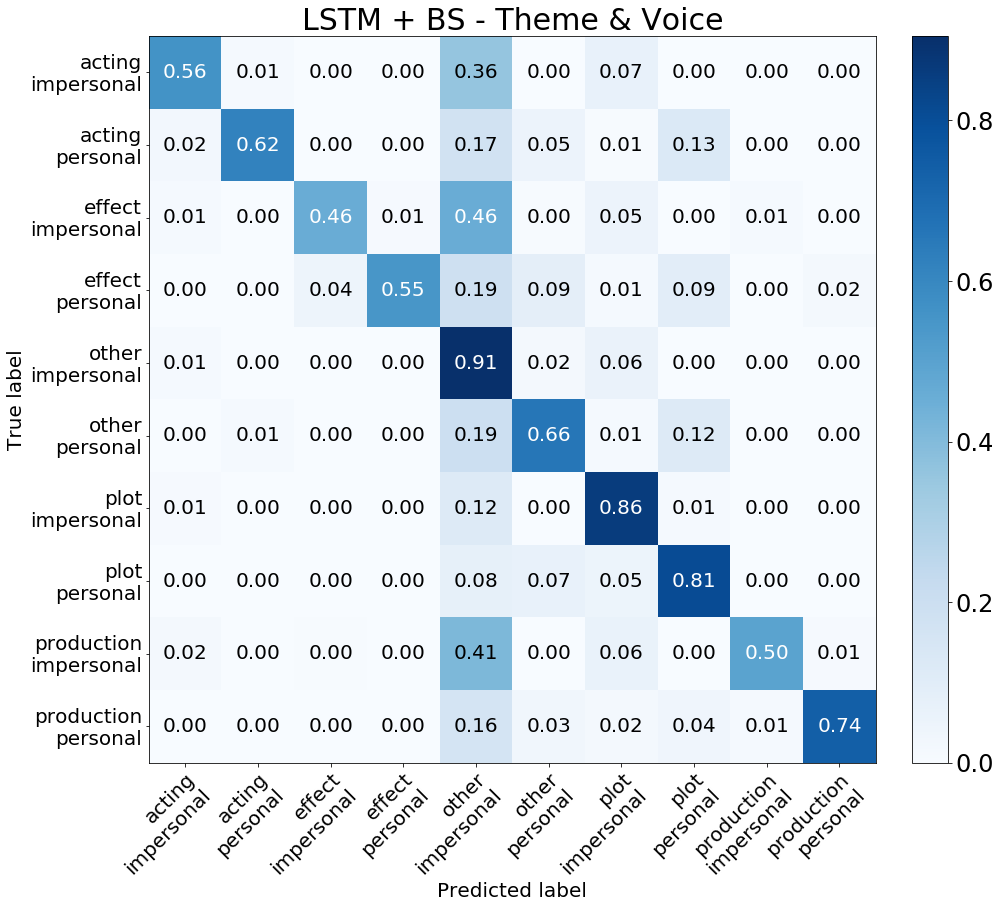

In [37]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, fsize='x-large'):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred) #list(classes) []
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=.5)
    
    cbar = ax.figure.colorbar(im, cax=cax)#, labelsize='x-large')
    
    cbar.ax.tick_params(labelsize=24) 
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fsize)
    ax.set_xlabel(xlabel='Predicted label', fontsize=fsize)
    ax.set_ylabel(ylabel='True label', fontsize=fsize)
    ax.set_title(title, fontsize=30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", size=fsize)
    fig.tight_layout()
    return ax

rcParams['figure.figsize'] = 14, 14
np.set_printoptions(precision=2)

DF = baseline_2c
plot_confusion_matrix(DF.true_label, DF.predicted_label, classes=DF.true_label.unique(), normalize=True,
                      title='LSTM + BS - Theme & Voice', fsize=20) # & Voice

#plot_confusion_matrix(DF.true_theme, DF.predicted_theme, classes=DF.true_theme.unique(), normalize=True,
#                      title='Baseline model - 1 label - Theme')

#plot_confusion_matrix(DF.true_perspective, DF.predicted_perspective, classes=DF.true_perspective.unique(), normalize=True,
#                      title='Perspective')

plt.show()

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable